In [239]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [240]:
c_R_w = np.array([[1/sqrt(2)  , 1/sqrt(2) , 0 ],
                  [-1/sqrt(2) , 1/sqrt(2) , 0 ],
                  [0          , 0         , 1]]) # rotation matrix

c_t_w = np.array([[-5],[0.5],[4]]) # translation matrix

c_T_w = np.hstack((c_R_w,c_t_w)) # Transformation Matrix

K = np.array([ [-100, 0    , 200], # prespective projection and scale & shift matrix
               [0   , -100 , 200],
               [0   , 0    , 1]])

In [241]:
houseBase_3DPoints = np.array([[0,0,0],
                               [1,0,0],
                               [1,1,0],
                               [0,1,0],
                               [0,0,0]]) # base/foundation poitns of the house

housePillar_3DPoints = np.array([[0,0,1],
                                 [0,0,0],
                                 [1,0,0],
                                 [1,0,1],
                                 [1,0,0],
                                 [1,1,0],
                                 [1,1,1],
                                 [1,1,0],
                                 [0,1,0],
                                 [0,1,1],
                                 [0,1,0]]) # Pillar points of the house

houseRoofBase_3DPoints = np.array([[0,0,1],
                                   [1,0,1],
                                   [1,1,1],
                                   [0,1,1],
                                   [0,0,1]]) # Roof base poitns of the house

houseRoof_3DPoints = np.array([[0,0,1],
                                [1/2,0,3/2],
                                [1,0,1],
                                [1,1,1],
                                [1/2,1,3/2],
                                [0,1,1],
                                [1/2,1,3/2],
                                [1/2,0,3/2]]) # Roof poitns of the house

#house_3DPoints = np.concatenate((houseBase_3DPoints,housePillar_3DPoints,houseRoofBase_3DPoints,houseRoof_3DPoints)) # All points to make House using Line2D
house_3DPoints = np.concatenate((houseRoof_3DPoints,houseRoofBase_3DPoints,housePillar_3DPoints,houseBase_3DPoints))

In [242]:
# get 2D points for House
house_2DPoints = np.zeros((len(house_3DPoints),2))

homogenouse_2DPoints = []

for i in range(len(house_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((house_3DPoints[i],[1]))))
    house_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    house_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]

house_2DPoints = house_2DPoints.T

x_Roof = house_2DPoints[0,0:len(houseRoof_3DPoints)+1]
y_Roof = house_2DPoints[1,0:len(houseRoof_3DPoints)+1]
print(len(houseRoof_3DPoints))


8


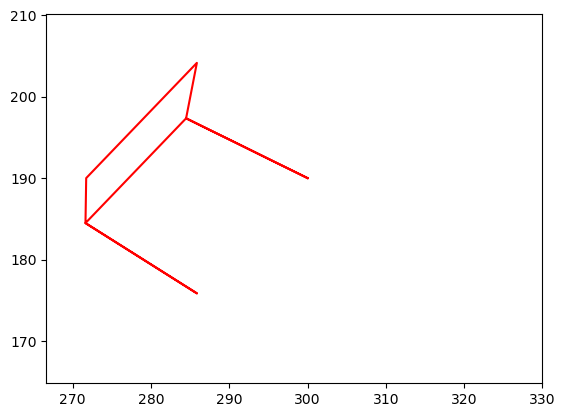

In [243]:
# Plot 2D House using Line2D
fig = plt.figure()
ax = fig.add_subplot(111)
line = lines.Line2D(x_Roof,y_Roof,color = 'red')
ax.add_line(line)
ax.set_xlim(min(x)-5, max(x)+5)
ax.set_ylim(min(y)-5, max(y)+5)
plt.show()